Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from glob import glob

In [2]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


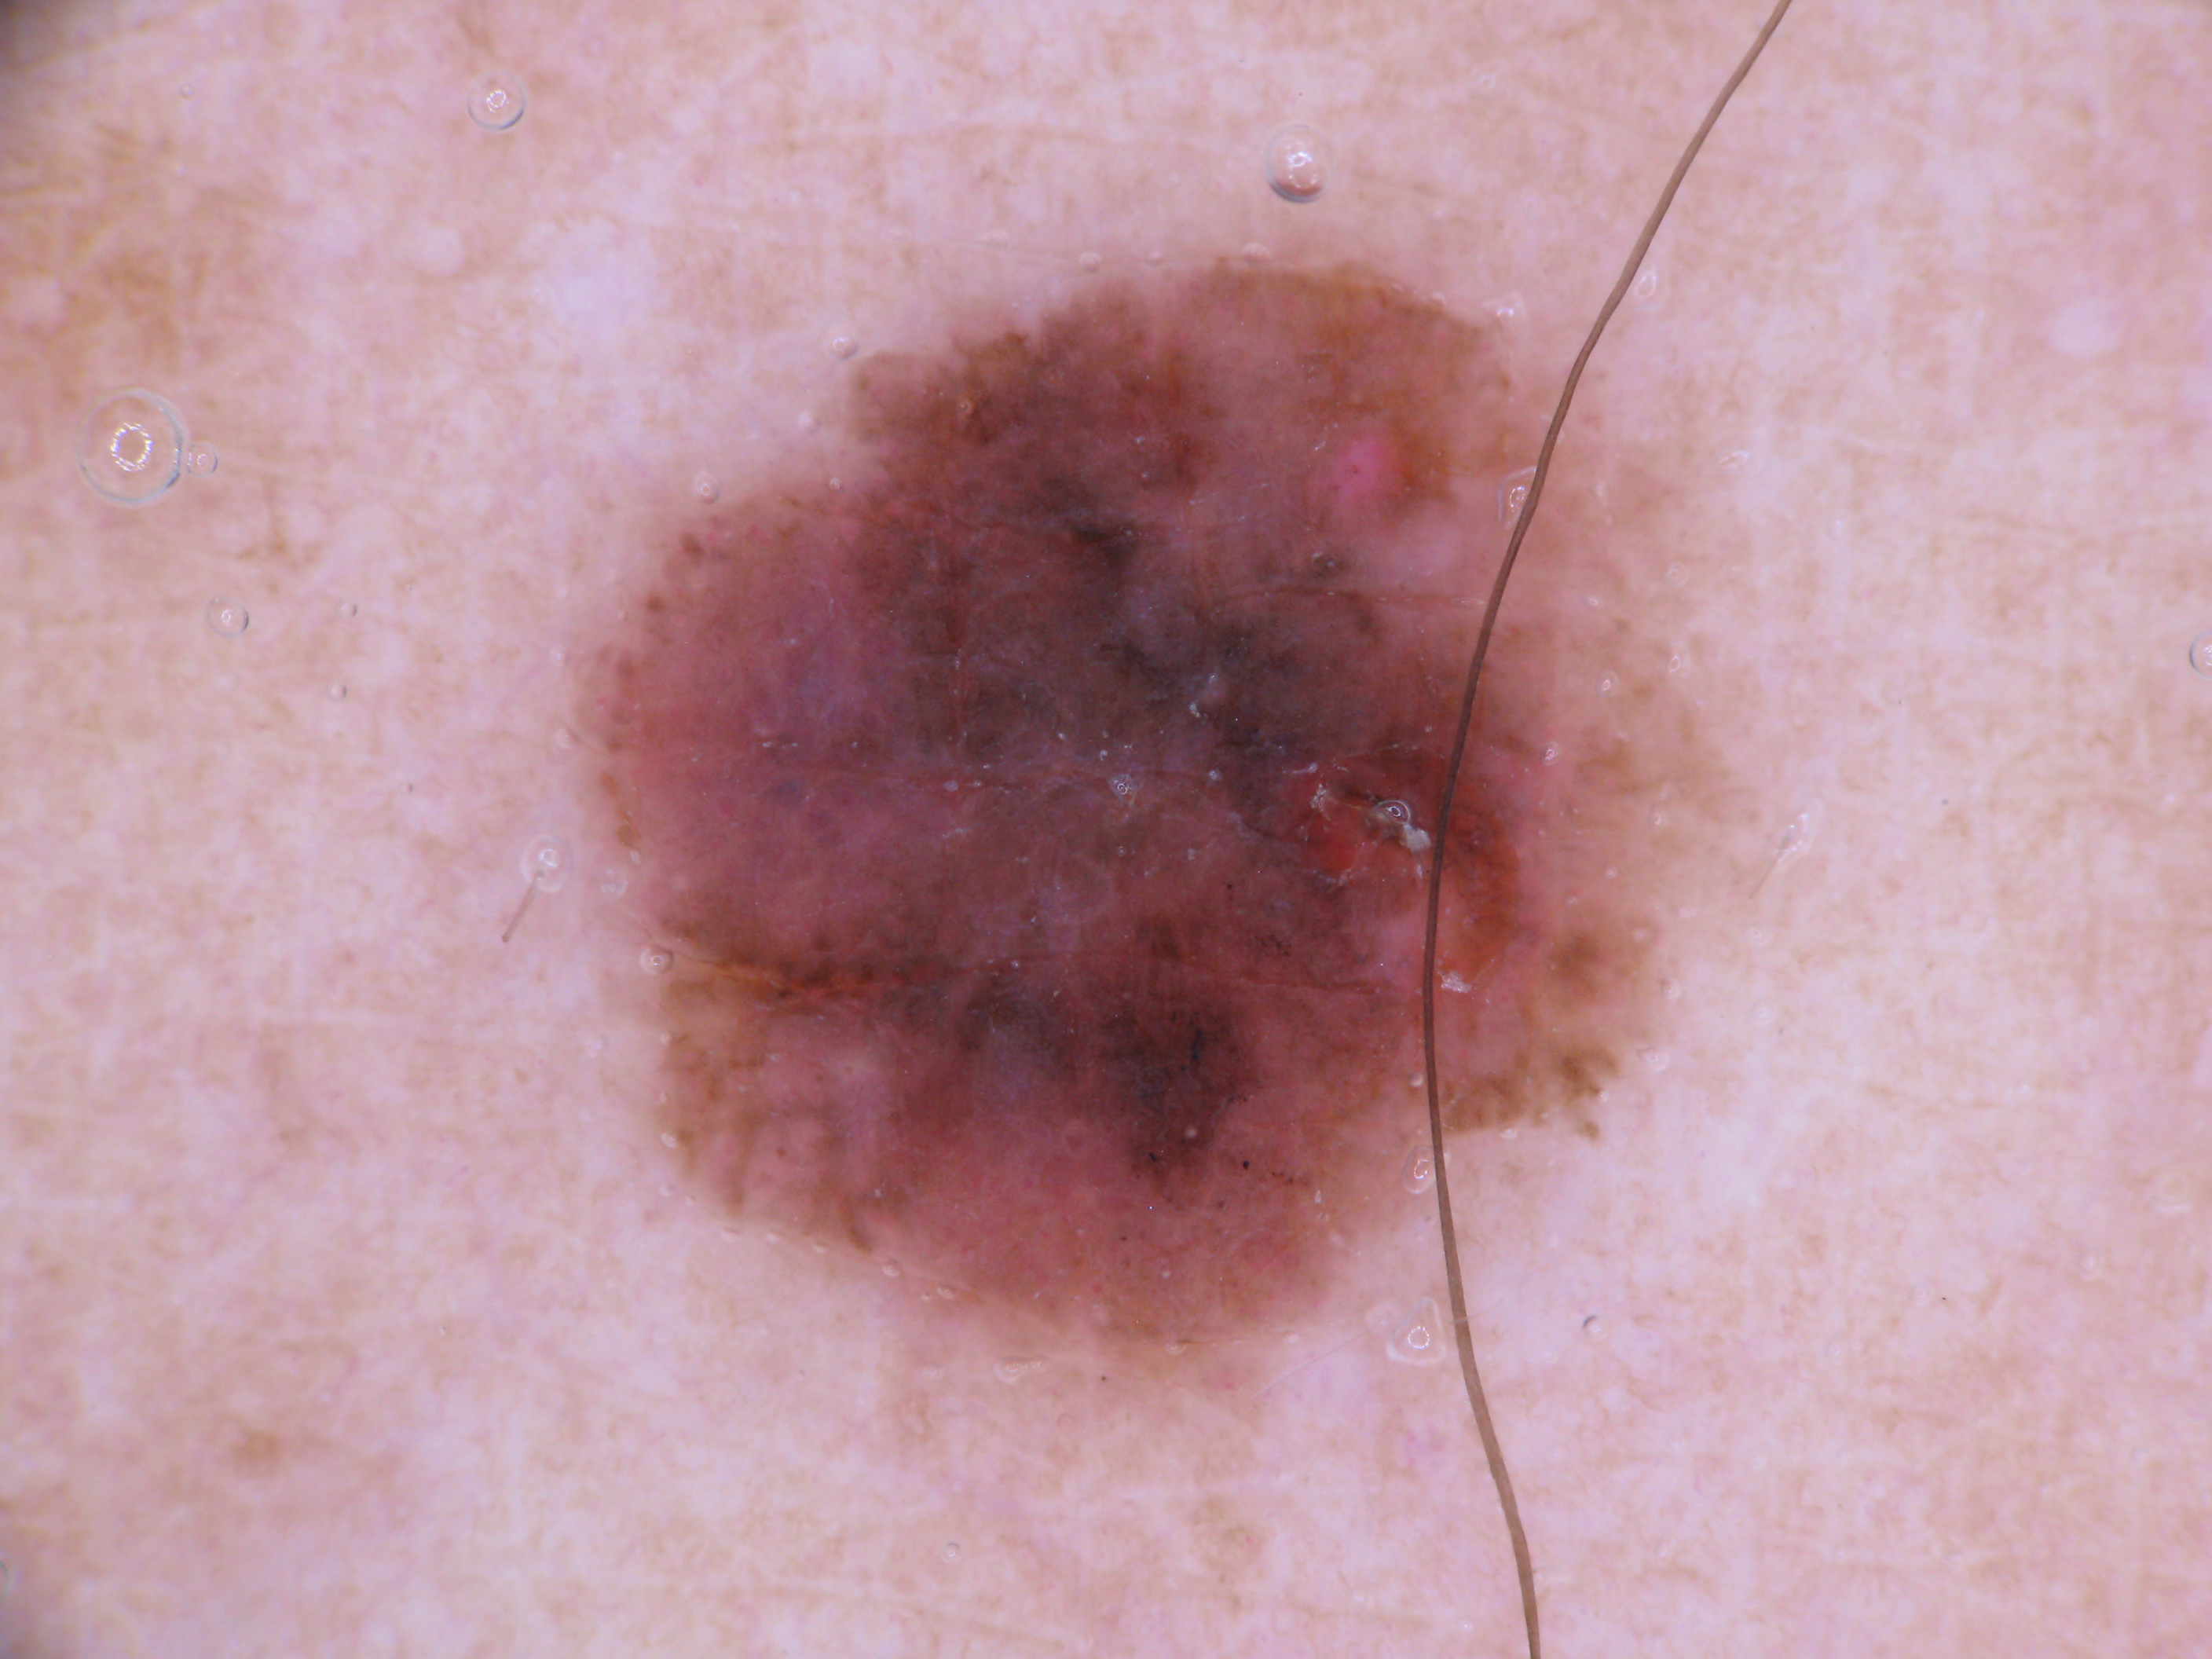

In [ ]:
# Image representaion of disease Melanoma
melanoma = list(data_dir_train.glob('melanoma/*'))
PIL.Image.open(str(melanoma[0]))

### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,validation_split=0.2,subset="training",seed=123,image_size=(img_height, img_width),batch_size=batch_size,labels="inferred")

Found 11239 files belonging to 9 classes.
Using 8992 files for training.


In [7]:

## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,validation_split=0.2,subset="validation",seed=123,image_size=(img_height,img_width),batch_size=batch_size,labels="inferred")

Found 11239 files belonging to 9 classes.
Using 2247 files for validation.


In [8]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

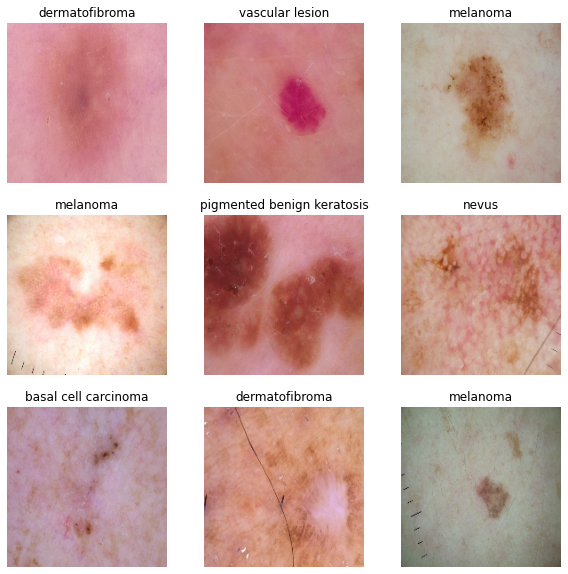

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


In [ ]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [9]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [10]:
## Rescaling the training dataset
### Your code goes here
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.035947554 1.0


In [ ]:
#

num_classes = 9
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
                    layers.Conv2D(16,3,padding="same",activation="relu"),
                    layers.MaxPooling2D(),
                    layers.Conv2D(32,3,padding="same",activation="relu"),
                    layers.MaxPooling2D(),
                    layers.Conv2D(64, 3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Flatten(),
                    layers.Dense(128,activation="relu"),
                    layers.Dense(9)

                    
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

### Train the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 323s 2s/step - loss: 2.2094 - accuracy: 0.1910 - val_loss: 1.5890 - val_accuracy: 0.3771
Epoch 2/20
169/169 [==============================] - 3s 19ms/step - loss: 1.5495 - accuracy: 0.4040 - val_loss: 1.4669 - val_accuracy: 0.4246
Epoch 3/20
169/169 [==============================] - 3s 19ms/step - loss: 1.3370 - accuracy: 0.4955 - val_loss: 1.2609 - val_accuracy: 0.5160
Epoch 4/20
169/169 [==============================] - 3s 19ms/step - loss: 1.1641 - accuracy: 0.5787 - val_loss: 1.1778 - val_accuracy: 0.5724
Epoch 5/20
169/169 [==============================] - 3s 20ms/step - loss: 0.9946 - accuracy: 0.6374 - val_loss: 1.0232 - val_accuracy: 0.6362
Epoch 6/20
169/169 [==============================] - 3s 20ms/step - loss: 0.8087 - accuracy: 0.7098 - val_loss: 0.9521 - val_accuracy: 0.6630
Epoch 7/20
169/169 [==============================] - 3s 20ms/step - loss: 0.6926 - accuracy: 0.7592 - val_loss: 0.9655 - val_accuracy: 0.6763

### Visualizing training results

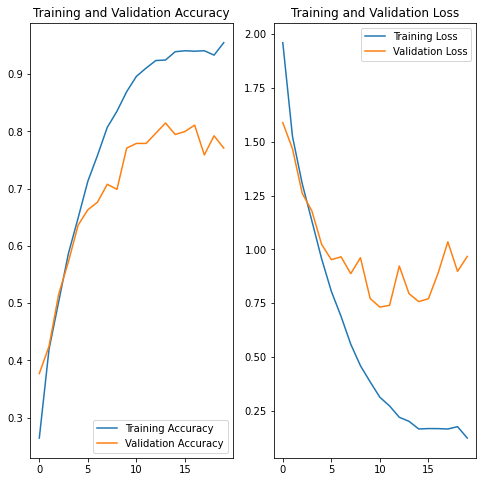

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit



###  Yes, Model is overfitted. To prevent this we use Data Augmentation.

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

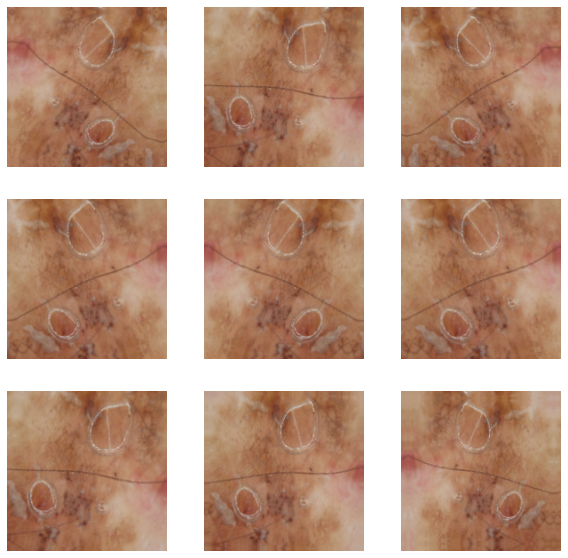

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[1].numpy().astype("uint8"))
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


### Compiling the model

In [ ]:
model.compile(optimizer="sgd",
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ["accuracy"])

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 5s 27ms/step - loss: 2.1770 - accuracy: 0.1487 - val_loss: 2.1157 - val_accuracy: 0.2079
Epoch 2/20
169/169 [==============================] - 4s 25ms/step - loss: 2.0981 - accuracy: 0.2024 - val_loss: 2.0220 - val_accuracy: 0.2287
Epoch 3/20
169/169 [==============================] - 4s 25ms/step - loss: 2.0030 - accuracy: 0.2380 - val_loss: 1.8619 - val_accuracy: 0.2784
Epoch 4/20
169/169 [==============================] - 4s 25ms/step - loss: 1.9027 - accuracy: 0.2733 - val_loss: 1.9030 - val_accuracy: 0.2739
Epoch 5/20
169/169 [==============================] - 4s 25ms/step - loss: 1.8479 - accuracy: 0.3187 - val_loss: 1.8923 - val_accuracy: 0.3088
Epoch 6/20
169/169 [==============================] - 4s 25ms/step - loss: 1.8448 - accuracy: 0.3212 - val_loss: 1.7606 - val_accuracy: 0.3430
Epoch 7/20
169/169 [==============================] - 4s 26ms/step - loss: 1.7462 - accuracy: 0.3545 - val_loss: 1.6060 - val_accuracy: 0.3801

In [ ]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  #layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2,2)),
  #layers.Dropout(0.25),

  layers.Conv2D(32, 3, padding='same', activation='relu'),
  #layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2,2)),
  #layers.Dropout(0.25),
  
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  #layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2,2)),
  #layers.Dropout(0.25),

  layers.Conv2D(128, 3, padding='same', activation='relu'),
  #layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Dropout(0.25),

  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(num_classes)

])

In [ ]:
model.compile(optimizer="adam",
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ["accuracy"])

In [ ]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 5s 28ms/step - loss: 2.0443 - accuracy: 0.1935 - val_loss: 1.6870 - val_accuracy: 0.3608
Epoch 2/20
169/169 [==============================] - 5s 27ms/step - loss: 1.5585 - accuracy: 0.3811 - val_loss: 1.4823 - val_accuracy: 0.4543
Epoch 3/20
169/169 [==============================] - 5s 27ms/step - loss: 1.4850 - accuracy: 0.4439 - val_loss: 1.4359 - val_accuracy: 0.4491
Epoch 4/20
169/169 [==============================] - 5s 27ms/step - loss: 1.3649 - accuracy: 0.4666 - val_loss: 1.4193 - val_accuracy: 0.4736
Epoch 5/20
169/169 [==============================] - 5s 27ms/step - loss: 1.3391 - accuracy: 0.4888 - val_loss: 1.3584 - val_accuracy: 0.4870
Epoch 6/20
169/169 [==============================] - 5s 28ms/step - loss: 1.2851 - accuracy: 0.5104 - val_loss: 1.2684 - val_accuracy: 0.5174
Epoch 7/20
169/169 [==============================] - 5s 27ms/step - loss: 1.1771 - accuracy: 0.5475 - val_loss: 1.2508 - val_accuracy: 0.5234

### Visualizing the results

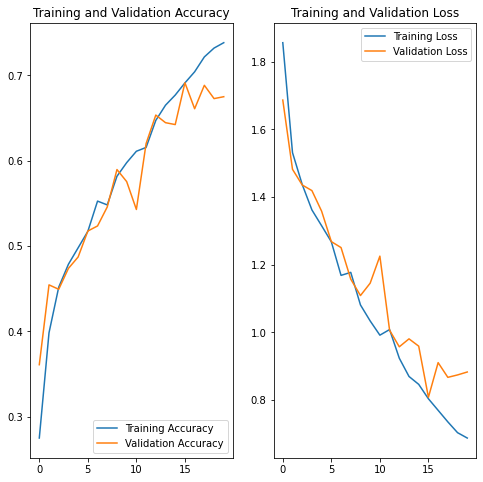

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

#### **Todo:** Write your findings here:

#### - Which class has the least number of samples?
####- Ans:  "Pigmented benign keratosis" has least number of samples.

#### - Which classes dominate the data in terms proportionate number of samples?
#### - Nevus

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [12]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [13]:
path_to_training_dataset="/content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F9C3512C090>: 100%|██████████| 500/500 [00:18<00:00, 26.62 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 376 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F9C35192990>: 100%|██████████| 500/500 [00:19<00:00, 26.19 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 95 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F9C48050750>: 100%|██████████| 500/500 [00:19<00:00, 26.06 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F9C351197D0>: 100%|██████████| 500/500 [01:30<00:00,  5.52 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 357 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7F9C35114050>: 100%|██████████| 500/500 [01:16<00:00,  6.57 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 462 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F9C350FAB90>: 100%|██████████| 500/500 [00:19<00:00, 25.99 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F9C351616D0>:   0%|          | 1/500 [00:00<01:25,  5.86 Samples/s]

Initialised with 77 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F9C35114ED0>: 100%|██████████| 500/500 [00:40<00:00, 12.35 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 181 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F9C351B4ED0>: 100%|██████████| 500/500 [00:19<00:00, 26.21 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 139 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F9CA05CAFD0>: 100%|██████████| 500/500 [00:19<00:00, 25.45 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [14]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

13500


In [15]:
#import glob2
from glob import glob

### Lets see the distribution of augmented data after adding new images to the original training data.

In [16]:

path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0030271.jpg_36bcbf89-90d7-4597-a553-2064ea03ed3b.jpg',
 '/content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0026970.jpg_64f8730b-8746-4bfb-81e6-57e0d0369682.jpg',
 '/content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0027675.jpg_22550d3b-e5ef-448f-a28c-5b5fd1f5e403.jpg',
 '/content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0027425.jpg_ad93c82d-b4a0-4d0f-aed0-31e7c6f25c82.jpg',
 '/content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imagin

In [17]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',


In [18]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [19]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
#new_df = original_df.append(df2)
df2

Path                 Label
0      /content/gdrive/My Drive/CNN_assignment/Skin c...  basal cell carcinoma
1      /content/gdrive/My Drive/CNN_assignment/Skin c...  basal cell carcinoma
2      /content/gdrive/My Drive/CNN_assignment/Skin c...  basal cell carcinoma
3      /content/gdrive/My Drive/CNN_assignment/Skin c...  basal cell carcinoma
4      /content/gdrive/My Drive/CNN_assignment/Skin c...  basal cell carcinoma
...                                                  ...                   ...
13495  /content/gdrive/My Drive/CNN_assignment/Skin c...  seborrheic keratosis
13496  /content/gdrive/My Drive/CNN_assignment/Skin c...  seborrheic keratosis
13497  /content/gdrive/My Drive/CNN_assignment/Skin c...  seborrheic keratosis
13498  /content/gdrive/My Drive/CNN_assignment/Skin c...  seborrheic keratosis
13499  /content/gdrive/My Drive/CNN_assignment/Skin c...  seborrheic keratosis

[13500 rows x 2 columns]

In [20]:
df2['Label'].value_counts()

nevus                         1500
vascular lesion               1500
melanoma                      1500
dermatofibroma                1500
actinic keratosis             1500
pigmented benign keratosis    1500
squamous cell carcinoma       1500
seborrheic keratosis          1500
basal cell carcinoma          1500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [21]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [22]:
#data_dir_train="path to directory with training data + data created using augmentor"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset ="training" ## Todo choose the correct parameter value, so that only training data is refered to,"",
  ,image_size=(img_height, img_width),
  batch_size=batch_size)

Found 15739 files belonging to 9 classes.
Using 12592 files for training.


#### **Todo:** Create a validation dataset

In [23]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 15739 files belonging to 9 classes.
Using 3147 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [41]:
num_classes=9
model = Sequential([
  
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),
  layers.Dropout(0.25),

  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),
  layers.Dropout(0.25),
  
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),
  layers.Dropout(0.25),

  
  layers.Dropout(0.25),

  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation="softmax")

])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [42]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [45]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
394/394 [==============================] - 84s 209ms/step - loss: 0.3491 - accuracy: 0.8729 - val_loss: 1.9836 - val_accuracy: 0.5736
Epoch 2/30
394/394 [==============================] - 84s 210ms/step - loss: 0.3166 - accuracy: 0.8846 - val_loss: 1.5809 - val_accuracy: 0.6126
Epoch 3/30
394/394 [==============================] - 84s 210ms/step - loss: 0.2821 - accuracy: 0.8943 - val_loss: 0.4278 - val_accuracy: 0.8621
Epoch 4/30
394/394 [==============================] - 83s 208ms/step - loss: 0.2708 - accuracy: 0.9003 - val_loss: 0.6117 - val_accuracy: 0.8008
Epoch 5/30
394/394 [==============================] - 83s 208ms/step - loss: 0.2818 - accuracy: 0.8976 - val_loss: 1.4090 - val_accuracy: 0.6492
Epoch 6/30
394/394 [==============================] - 84s 209ms/step - loss: 0.2471 - accuracy: 0.9076 - val_loss: 0.7809 - val_accuracy: 0.7985
Epoch 7/30
394/394 [==============================] - 83s 208ms/step - loss: 0.2462 - accuracy: 0.9123 - val_loss: 0.7648 - val_ac

#### **Todo:**  Visualize the model results

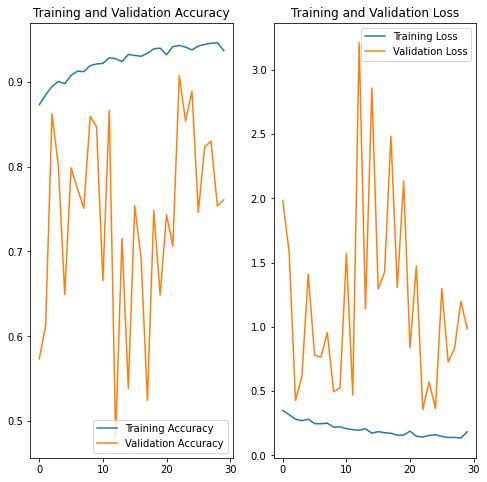

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?


#### Still there is an overfitting problem that we saw. So I think hyperparameter would help us to get rid of overfitting 
